<a href="https://colab.research.google.com/github/RodrigoKstor42/AVANCE-PROCESAMIENTO-DE-SE-ALES/blob/main/AVANCE_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


# TRANSCRIPCION AUTOMATICA DE SONIDOS DE PERCUSION

## CONCEPTO

La idea principal sobre la que se centra este proyecto es el diseño e implementación de un método para transcribir los golpes que ejecute un baterista a notación musical de manera automática y en tiempo real. El método a ser diseñado toma en consideración técnicas de procesamiento de datos a través de redes neuronales, al utilizar esta técnica se puede entrenar un modelo de aprendizaje de máquina que sea capaz de reconocer los golpes que se dan en la batería y los separe de acuerdo a ciertos parámetros acústicos. Existen dos problemáticas que este sistema busca resolver. El primero tiene que ver con la ampliación de sistemas previos los cuales se enfocan más en instrumentos melódicos. El segundo problema es que se resulta más complejo procesar los datos de manera automática a medida que son generados que si estos se ingresaran desde un banco de datos ya creado (una grabación de un CD, por ejemplo). Para resolver estos problemas se propone la creación de un algoritmo por aprendizaje de máquina que reconozca y separe las señales de los cuerpos de una batería y los convierta en notación musical. Para reducir la latencia entre el ingreso de datos y la transcripción se busca potenciar el sistema con tecnología actualizada como la aceleración por GPU.

## PRIMEROS AVANCES

Debido a que lo que se busca es el reconocimiento de los cuerpos de la bateria, se empezo recopilando datos de sonidos de bateria. Se encontro un dataset con grabaciones en alta calidad de los cuerpos que componen la bateria, se considero los siguientes cuerpos de una bateria estandar de 4 cuerpos:

- Bombo
- Caja
- Tom
- Platillos (hihat)

### BORIVERS DRUM SAMPLES


Este es el nombre del dataset encontrado el cual incluye mas de 500 muestras de audio que incluyen los cuerpos de una bateria de 4 cuerpos común.

In [ ]:
import IPython
IPython.display.Audio("Borivers Acoustic - Snare 01.wav")


In [ ]:
IPython.display.Audio("Borivers Acoustic - Kick Drum 01.wav")

In [9]:
IPython.display.Audio("Borivers Acoustic - Tom 01.wav")

In [10]:
IPython.display.Audio("Borivers Acoustic - Hihat Closed 01.wav")

## ADQUISICION DE AUDIO PARA MOSTRAR LA FORMA DE ONDA DEL AUDIO INGRESADO

Uno de los pasos que se dieron en el procesamiento de los datos que se tiene fue el reconocimiento de los audio para mostrar su forma de onda. Para realizar este avance se utilizo una librerial llamada torch, para este ejemplo usaremos una secuencia ritmica de golpes.

In [12]:
IPython.display.Audio("Borivers - Stadium Rock Drum Fill_01 - 130 BPM.wav")

Duración del audio: 2.769229166666667 segundos
Número de canales: 2
Frecuencia de muestreo: 48000 Hz


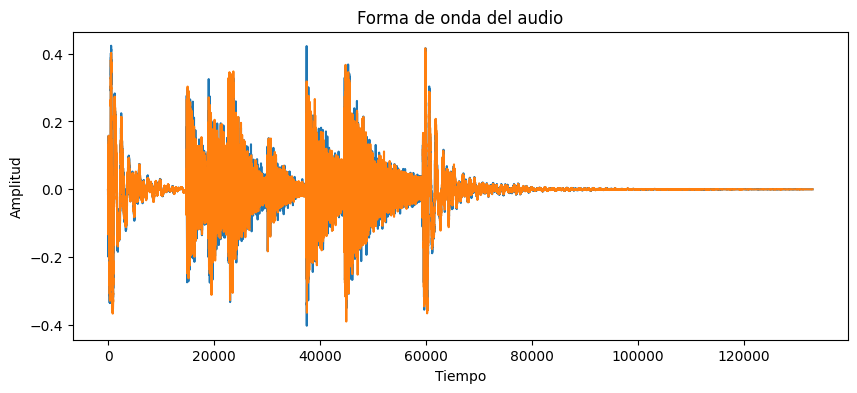

In [11]:
# Importar las bibliotecas necesarias
import torch  # Biblioteca PyTorch para computación numérica
import torchaudio  # Biblioteca PyTorch para procesamiento de audio
import matplotlib.pyplot as plt  # Biblioteca para graficar datos

# Cargar un archivo de audio utilizando torchaudio
# La función load carga el archivo de audio y devuelve la forma de onda y la frecuencia de muestreo
waveform, sample_rate = torchaudio.load('Borivers - Stadium Rock Drum Fill_01 - 130 BPM.wav')

# Mostrar información sobre el audio cargado
print("Duración del audio:", waveform.size(1) / sample_rate, "segundos")  # Calcula y muestra la duración del audio
print("Número de canales:", waveform.size(0))  # Muestra el número de canales de audio
print("Frecuencia de muestreo:", sample_rate, "Hz")  # Muestra la frecuencia de muestreo del audio

# Graficar la forma de onda del audio
plt.figure(figsize=(10, 4))  # Establece el tamaño de la figura
plt.plot(waveform.t().numpy())  # Grafica la forma de onda transpuesta y convertida a un array NumPy
plt.xlabel('Tiempo')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.title('Forma de onda del audio')  # Título de la gráfica
plt.show()  # Muestra la gráfica

## EXTRACCION DE ESPECTROGRAMAS

En este punto, era de vital importancia la extraccion de este tipo de datos ya que estos eran los tipos de datos que podian ser usados para alimentar un modelo por aprendizaje de maquina que sea capaz de reconocer estos sonidos y clasificarlos. En ese sentido es que se utilizaron librerias como librosa y matplotlib para cargar los audios, procesarlos y mostrar los graficos.

### 1. IMPORTAMOS LAS LIBRERIAS QUE VAMOS A UTILIZAR

In [14]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

### 2. CARGAMOS LOS AUDIOS QUE SE UTILIZARAN EN ESTE CASO.

In [16]:
scale_file = "Borivers - Stadium Rock Drum Fill_01 - 130 BPM.wav"
debussy_file = "Borivers Acoustic - Hihat Closed 01.wav"
redhot_file = "Borivers Acoustic - Kick Drum 01.wav"
duke_file = "Borivers Acoustic - Kick Drum 01.wav"


### 3. SE REPRODUCE CADA AUDIO

In [18]:
ipd.Audio(scale_file)


In [19]:
ipd.Audio(debussy_file)


In [20]:
ipd.Audio(redhot_file)


In [21]:
ipd.Audio(duke_file)

In [22]:
scale, sr = librosa.load(scale_file)
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)


### 4. EXTRAEMOS LA TRANSFORMADA CORTA DE FOURIER

In [23]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [24]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [25]:
S_scale.shape

(1025, 120)

In [26]:
type(S_scale[0][0])

numpy.complex64

### 5. CALCULAMOS EL ESPECTROGRAMA

In [27]:
Y_scale = np.abs(S_scale) ** 2

In [28]:
Y_scale.shape

(1025, 120)

In [29]:
type(Y_scale[0][0])

numpy.float32

### 6. VISUALIZAMOS EL ESPECTROGRAMA

In [30]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25, 10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis="time",
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f")

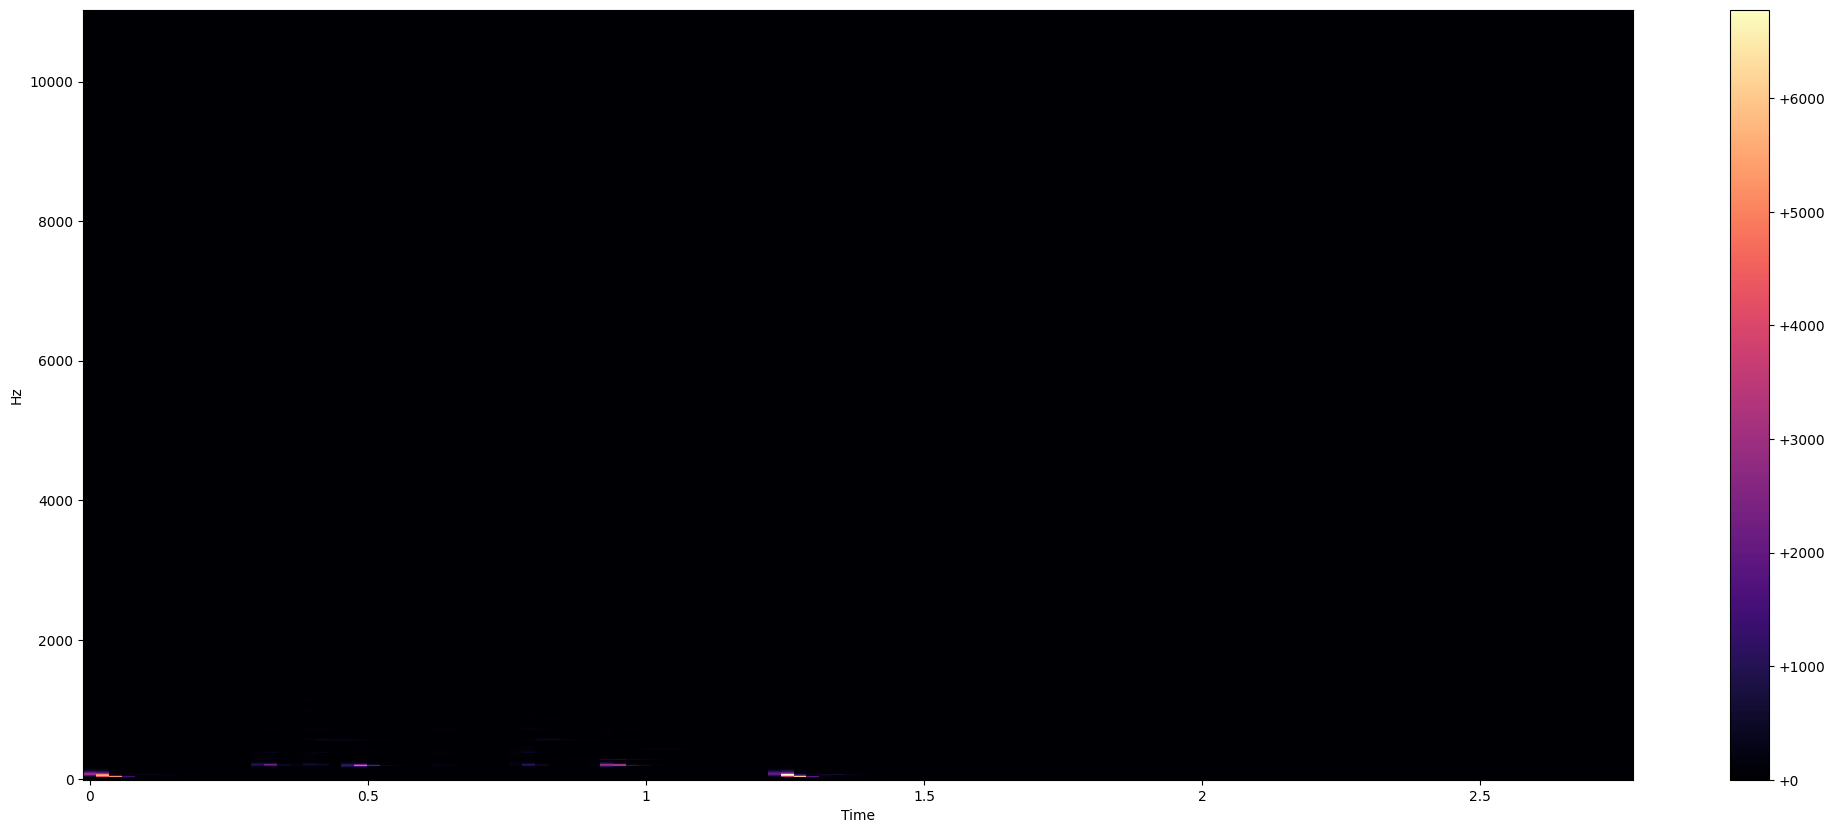

In [31]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

### 7. MOSTRAMOS EL ESPECTROGRAMA DE AMPLITUDES

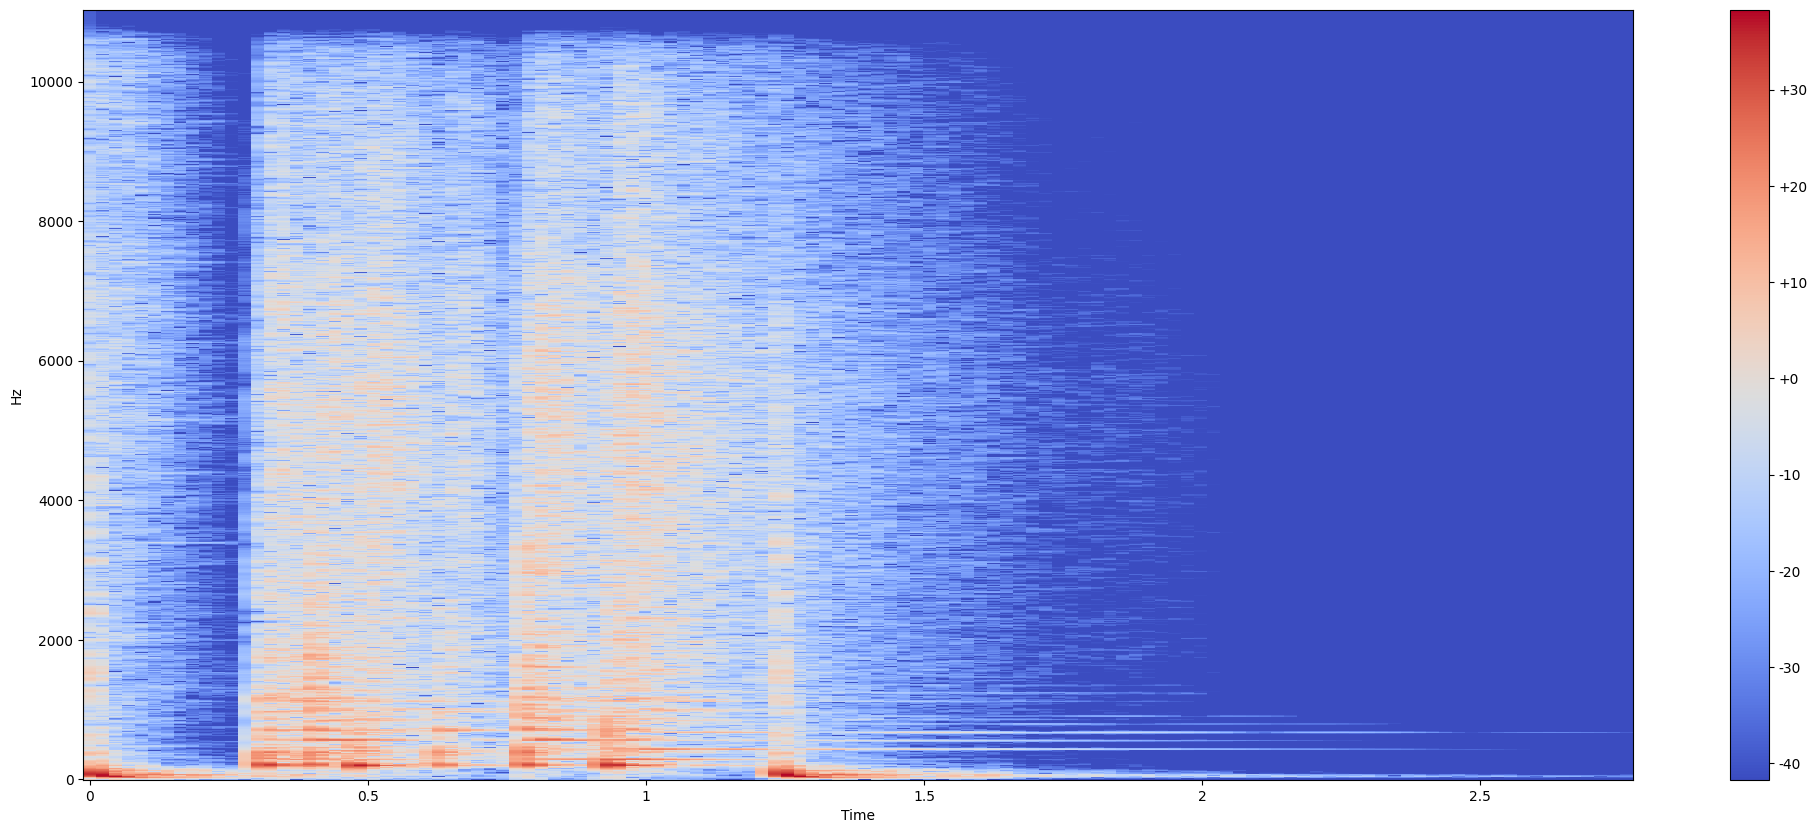

In [32]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

### 8. MOSTRAMOS EL ESPECTROGRAMA DE FRECUENCIAS

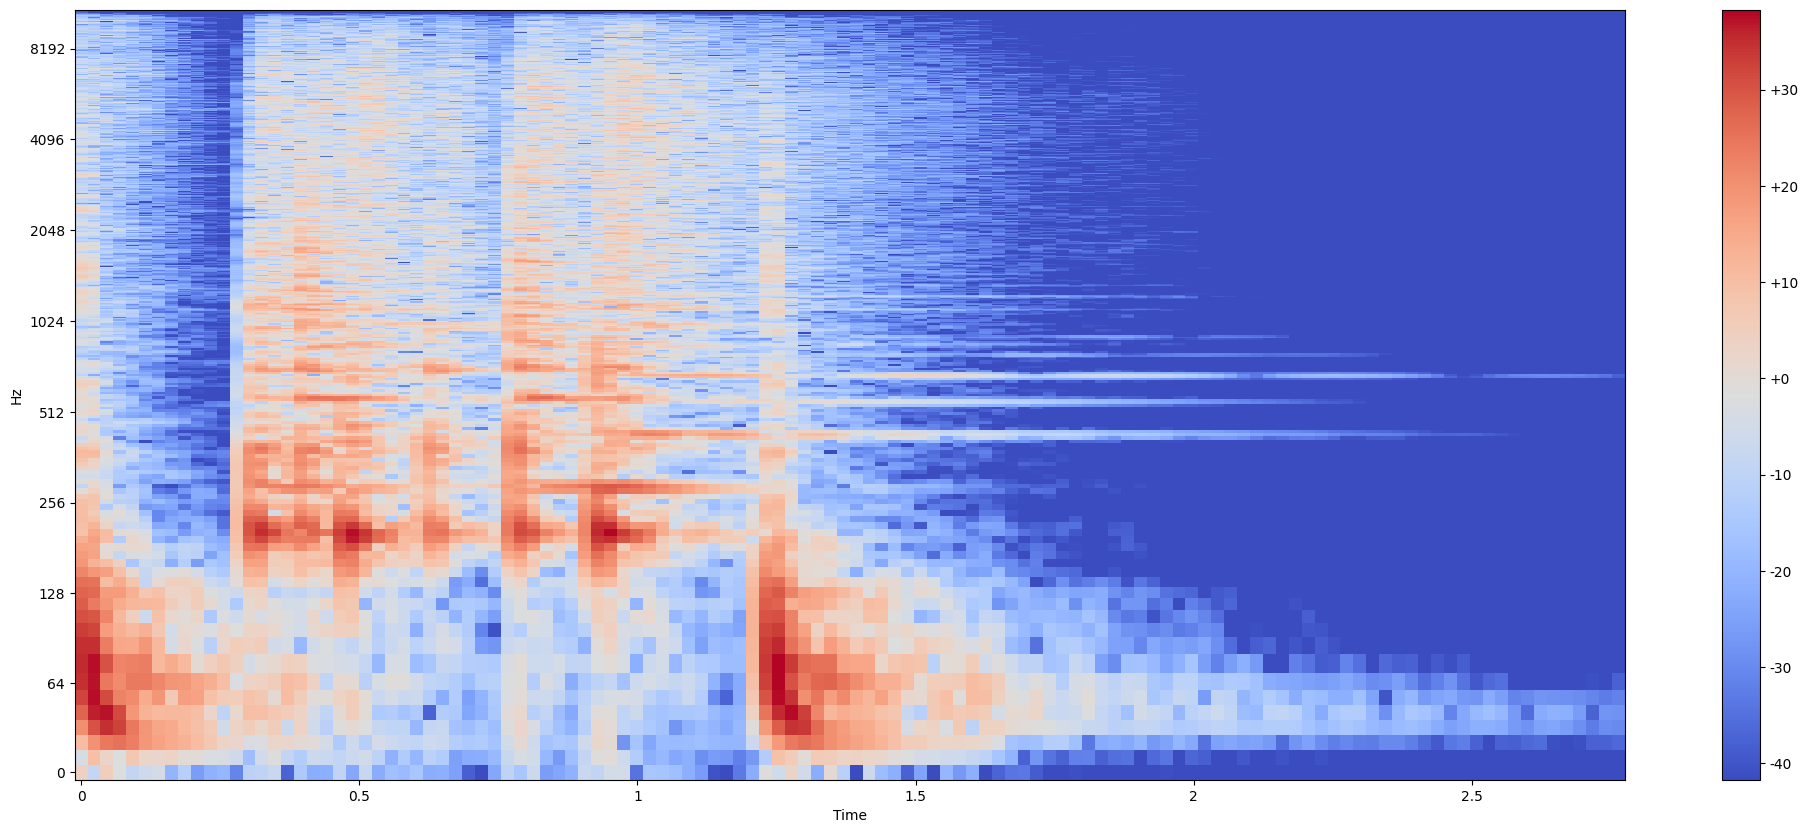

In [33]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

### 9. VISUALIZAMOS LOS DEMAS AUDIOS

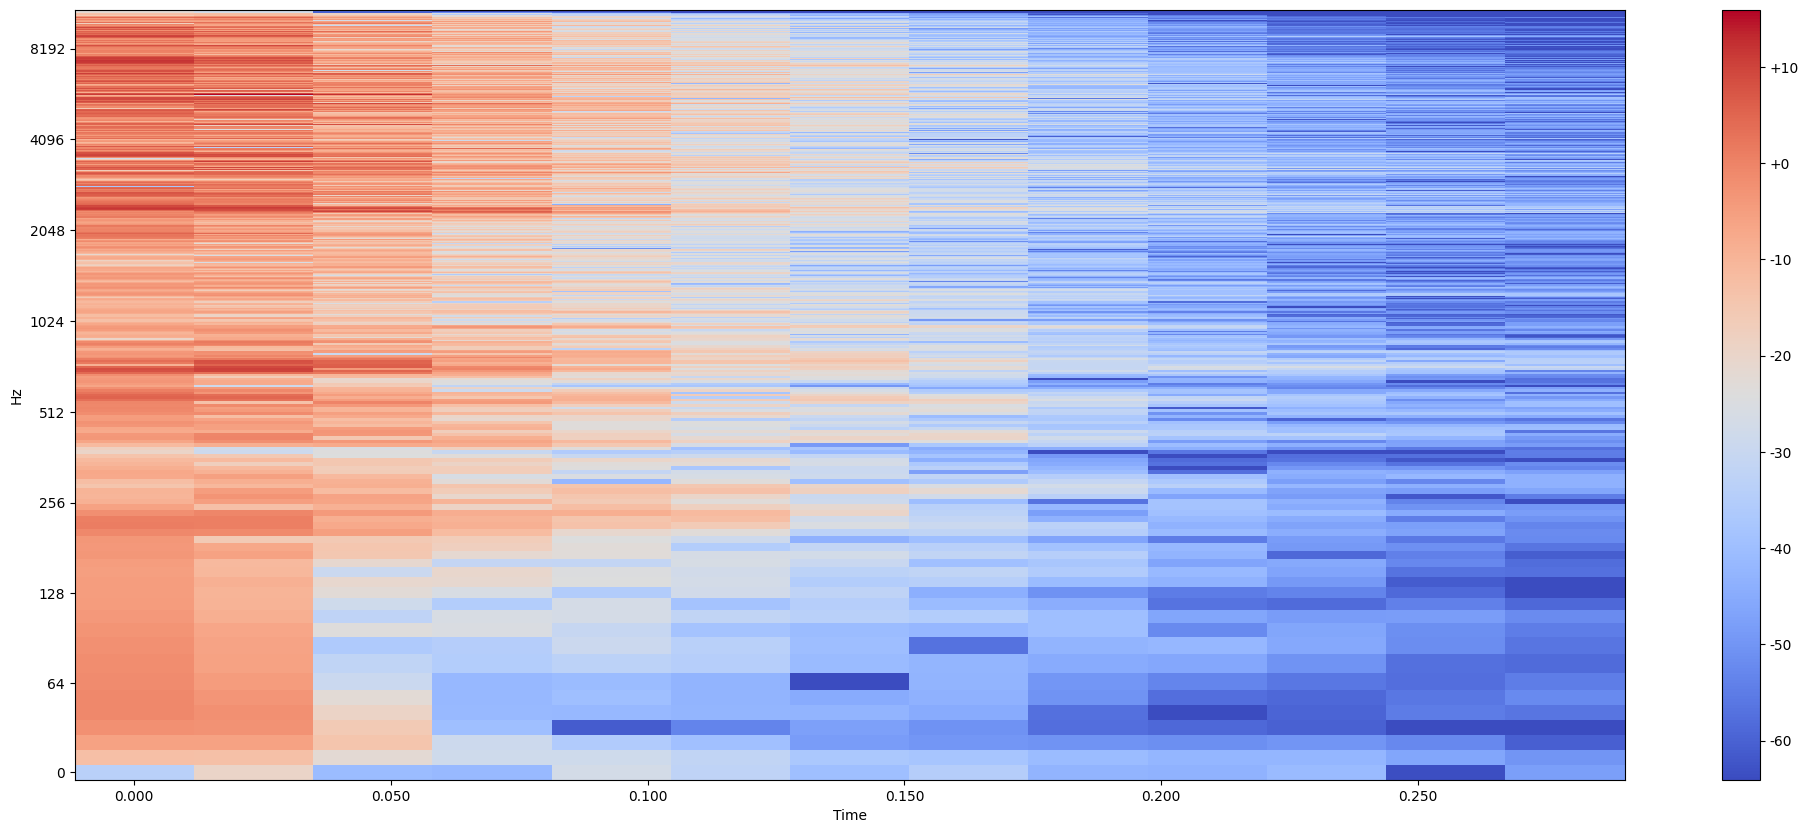

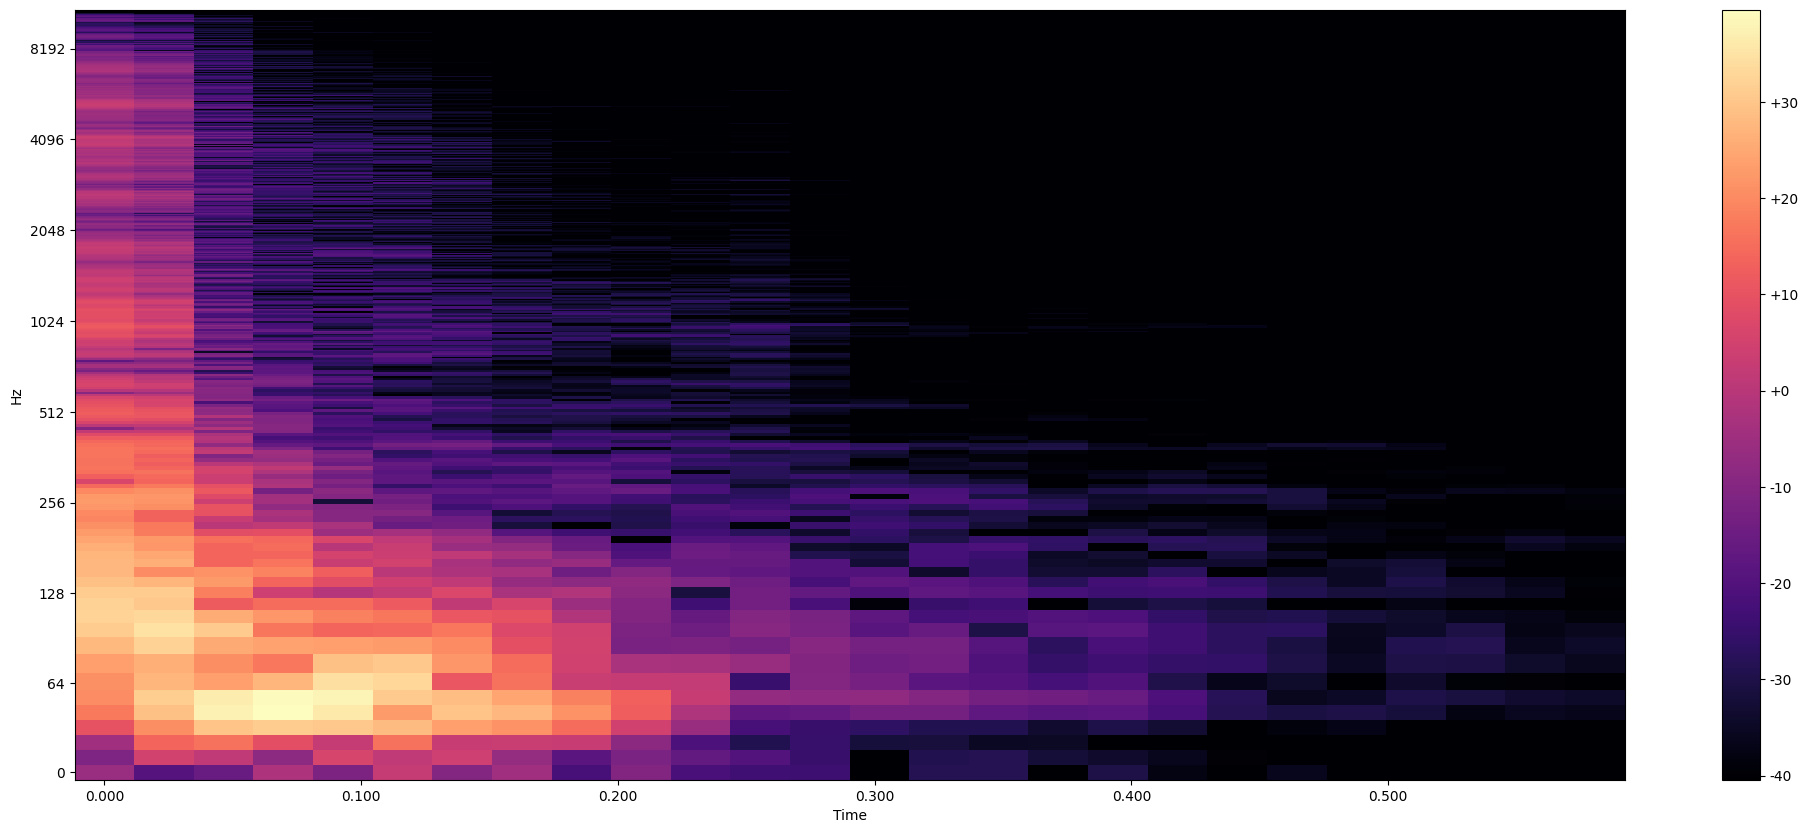

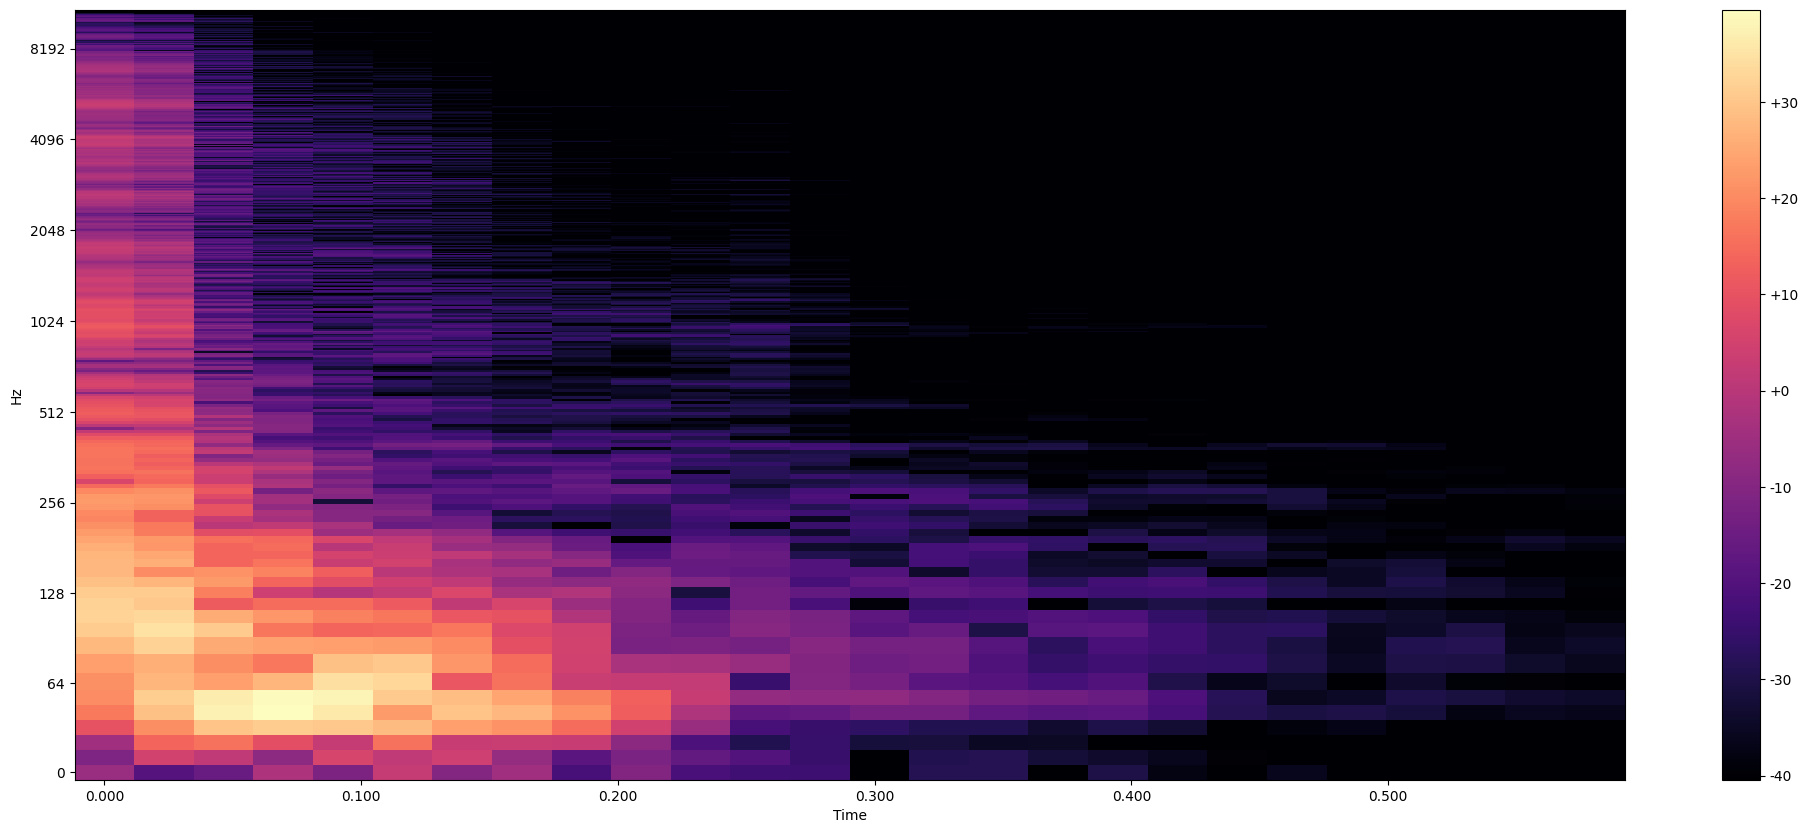

In [34]:
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot) ** 2)
Y_duke = librosa.power_to_db(np.abs(S_duke) ** 2)

plot_spectrogram(Y_debussy, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_redhot, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_duke, sr, HOP_SIZE, y_axis="log")

***************************************************************************************************************************************************************

## APROXIMACION A LA INTELIGENCIA ARTIFICIAL Y LOS MODELOS POR APRENDIZAJE DE MAQUINA

  Una vez habiendo entendido el uso y la importancia de la extraccion de espectrogramas, el siguiente paso fue ahondar mas en la tecnologia de aprendizaje de maquina y la inteligencia artificial. Para esto se decidio estudiar mas a fondo el uso de la libreria "pytorch", herramienta muy util la cual posee numerosas utilidades para este tipo de aplicaciones.
  A pesar de eso, el uso de esta libreria conllevo algunas dificultades, como las que incluyen la incompatibilidad para su uso con ciertas versiones especificas del sistema operativo Windows 11 y el uso mas optimizado en entornos de desarrollo como son PyCharm. A pesar de eso se logro tener un mayor entendimiento de esta libreria lo que se muestra con los resultados siguientes:

- Utilizacion del dataset MNIST, el primer paso consistio en familiarizarse con la sintaxis y las herramientas de la libreria, para lo cual existe un ejemplo en el que se entrena un modelo por 10 epocas para que sea capaz de reconocer los digitos del dataset MNIST, el cual es un dataset de imagenes de numeros.
Se tuvo el siguiente resultado:

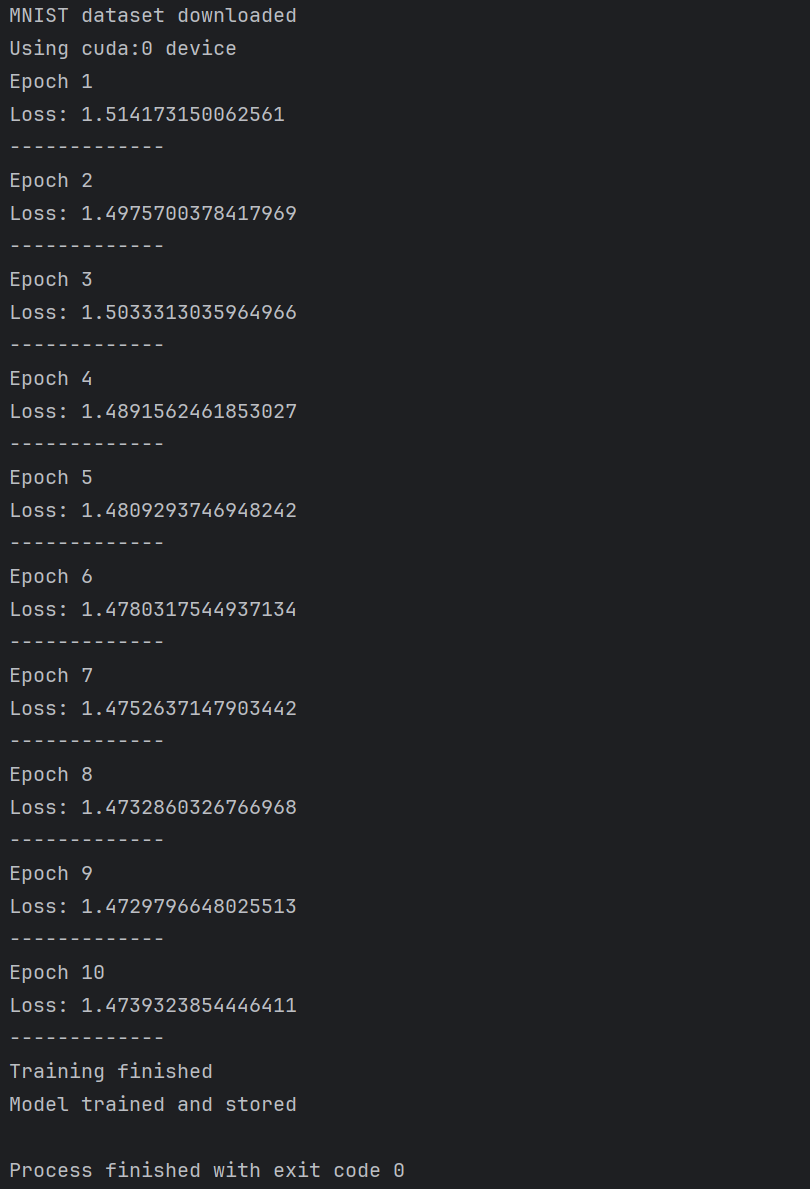

- Lo siguiente fue aprender como es que funciona el sistema de predicciones de pytorch, esto nos fue util para saber como predecir los valores de los datos que le vayamos a alimentar, a pesar de eso, en este punto seguimos trabajando con el dataset MNIST.

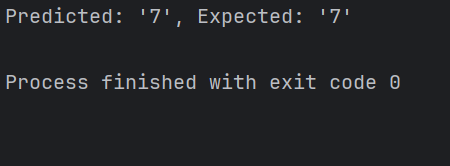

- A continuacion pasamos de usar el dataset MNIST a orientarnos mas al audio, en ese sentido se decidio probar ejemplos con el dataset UrbanSoundDataSet, el cual se compone por sonidos ambiente de ciudades. En este caso el ejemplo muestra programar algoritmo para ser capaz de extraer mel espectrogramas. En este caso el objetivo era que el algoritmo sea capaz de extraer 64 datos y un dataset que tiene un total de 8732 archivos.

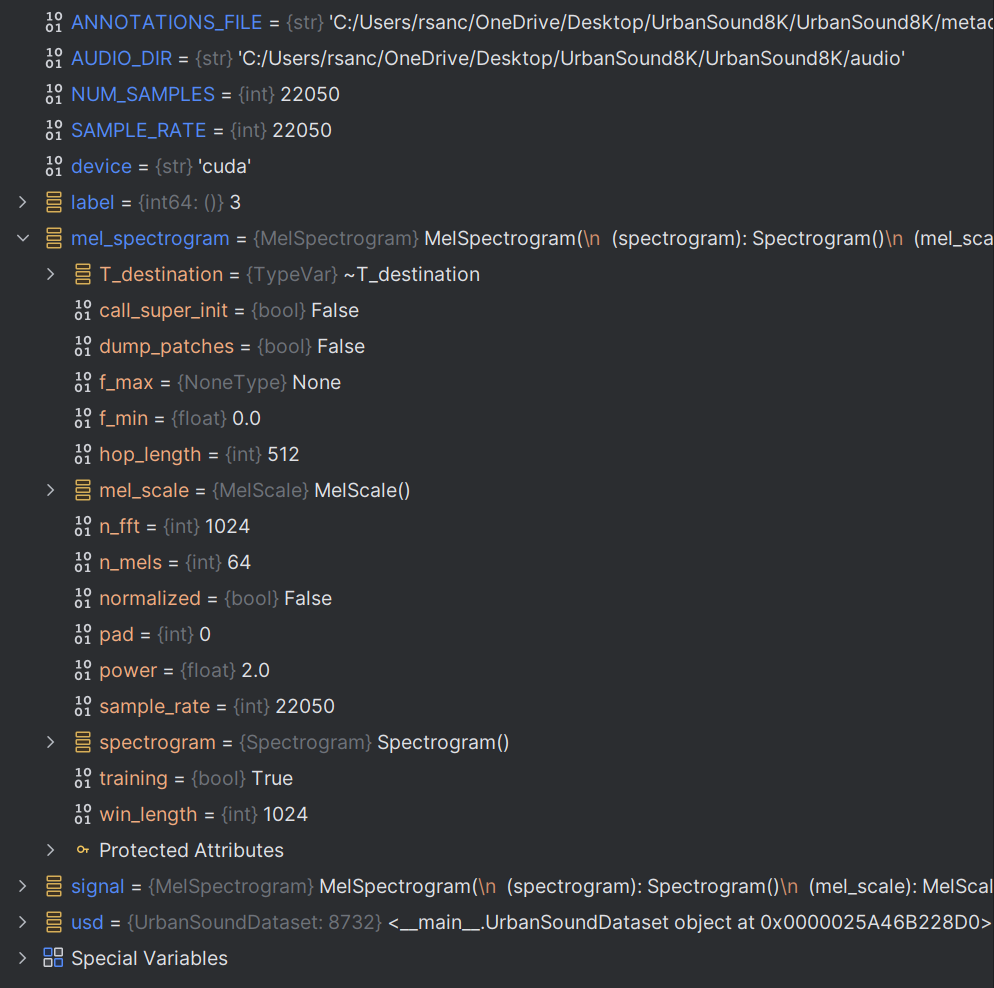

- Lo siguiente que se aprendio fue en relacion al aprendizaje profundo y comoe estos modelos estan estrechamente relacionados con los tipos de aceleracion. Basicamente si corremos nuestro modelo utilizando CPU, los tiempos de entrenamiento y aprendizaje seran mas lentos a diferencia que si fueran GPU dependientes. El resultado mostrado a continuacion muestra que para la programacion usada se cuenta con aceleracion por GPU o conocido tambien como aceleracion CUDA.

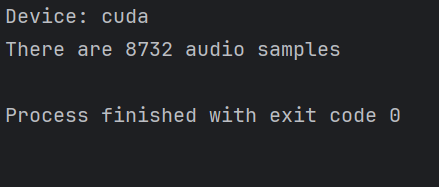

*******************************************************************************************

## CONCLUSIONES

El avance mostrado en el documento presente es muestra que existe un mundo aparte detras de todos estos terminos que se oyen a menudo como lo son la inteligencia artificial, el aprendizaje de maquina y otros. Por lo tanto se concluye que el descubrimiento e implementacion de mas herramientas, es un trabajo a ser retomado y profundizado a futuro. Dado que el objetivo principal detras del procesamiento de estos datos es la union entre el arte percutivo y la ingenieria, este proyecto merece ser llevado a cabo con mayor calma y dedicacion para alcanzar una comunion entre estos dos ambitos tan extensos.

***********************************************************************************************************************************